# Introduction

For logistic equations, the steady state is given by the ratio of the growth rate over the self-interaction. The distribution of abundances for a set of logistic equations is thus a ratio distribution. In this notebook, we plot ratio of uniform distributions and ratio of lognormal distributions.

## Standard imports

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

import time
np.random.seed(int(time.time()))

## Specific imports

In [2]:
from scipy import stats
from matplotlib import colorbar as mcolorbar

import sys
sys.path.insert(1, '../helper_functions')

from piecewise_normalizations import PiecewiseLogNorm, PiecewiseNormalize, PiecewiseSymLogNorm

from heavytails import fit_heavytail, plot_heavytail

from load_experimental_data import load_experimental_abundances, load_experimental_data

In [3]:
normalizations = {'JS' : PiecewiseNormalize([0, 0.3, 1], [0, 0.5, 1]),
                  'width' : PiecewiseLogNorm([0.01, 2, 50], [0, 0.5, 1]),
                  'pval' : PiecewiseNormalize([0, 0.05, 1], [0, 0.5, 1]),
                  'diff_width' : PiecewiseLogNorm([-10, 0, 10], [0, 0.5, 1], linthresh=1e-2),
                  'filling' : PiecewiseLogNorm([0.1, 1, 10], [0, 0.5, 1]),
                  'number' : PiecewiseNormalize([0,50,100], [0, 0.5, 1]),
                  'stability' : PiecewiseLogNorm([-0.1,0,0.1], [0, 0.5, 1], linthresh=1e-3),
                  'diff_JS' : None, 'diff_pval' : None, 'diff_filling' : None, 
                  'diff_number' : None, 'diff_stability' : None
}

## Load experimental data

In [5]:
df_st = load_experimental_abundances()
df_ts = load_experimental_data()

## Figure settings

In [28]:
import sys
sys.path.insert(1, '../helper_functions')

from elife_settings import set_elife_settings, ELIFE
from presentation_settings import set_presentation_settings, PRESENTATION

#set_elife_settings()
set_presentation_settings()

# Ratio of Uniform Distributions

In logistic equation the steady state is given by the growth rate divided by the self interaction.

Imagine the the self interaction and the growth rate are uniform distributions between [0, a] and [0, b] respectively. It follows that the distribution of the steady states is

$ f(x) = \frac{1}{2\phi} $ for $ 0 < x < \phi $
and $ f(x) = \frac{\phi}{2 x^2} $ for $ x > \phi $
with $ \phi = b/a $

In [9]:
def ratio_uniform_distributions_1(x, phi):
    if x < 0: 
        return 0
    elif x < phi:
        return 0.5/phi
    else:
        return phi/(2*x**2)

ratio_uniform_distributions = np.vectorize(ratio_uniform_distributions_1) 

def cumulative_ratio_uniform_distributions_1(x, phi):
    if x < 0:
        return 0
    elif x < phi:
        return 0.5/phi*x
    else:
        return 1 - phi/(2*x)

cumulative_ratio_uniform_distributions = np.vectorize(cumulative_ratio_uniform_distributions_1) 
  
class RatioUniformDistributions(stats.rv_continuous):
    def _pdf(self, x, phi):
        return ratio_uniform_distributions(x, phi) 
    
    def _cdf(self, x, phi):
        return cumulative_ratio_uniform_distributions(x, phi)
        
    def _argcheck(self, phi):
        return phi > 0

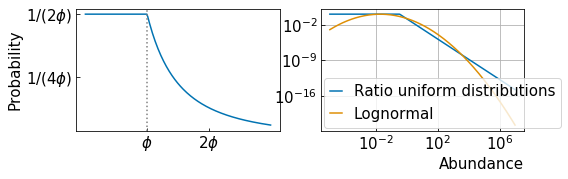

In [32]:
#fig = plt.figure(figsize=(ELIFE.TEXTWIDTH, 1.5))
fig = plt.figure(figsize=(0.6*PRESENTATION.SLIDEWIDTH, 0.3*PRESENTATION.SLIDEHEIGHT))
ax = fig.add_subplot(121)
x = np.linspace(0, 3, 200)
ax.plot(x, ratio_uniform_distributions(x, 1))
ax.axvline(x=1, linestyle=':', color='grey')
ax.set_xticks([1, 2])
ax.set_xticklabels(['$\phi$', '$2\phi$'])
ax.set_yticks([0.25, 0.5])
ax.set_yticklabels(['$1/(4\phi)$', '1/(2$\phi$)'])
ax.set_ylabel('Probability')

ax = fig.add_subplot(122)
x = np.logspace(-5, 7, 300)
ax.plot(x, ratio_uniform_distributions(x, 1/3), label='Ratio uniform distributions')
ax.plot(x, stats.lognorm.pdf(x, 2, 0), label='Lognormal')
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid()
ax.legend()
ax.set_xlabel('Abundance', x=1, ha='right')
#plt.savefig('figures/ratio_uniform_distributions.pdf')
plt.savefig('../figures_presentation/ratio_uniform_distributions.pdf')
plt.show()

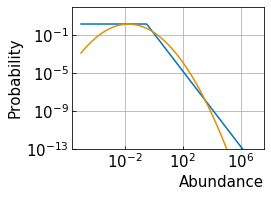

In [41]:
fig = plt.figure(figsize=(0.3*PRESENTATION.SLIDEWIDTH, 0.4*PRESENTATION.SLIDEHEIGHT), tight_layout=True)
ax = fig.add_subplot(111)
x = np.logspace(-5, 7, 300)
ax.plot(x, ratio_uniform_distributions(x, 1/3), label='Ratio uniform distributions')
ax.plot(x, stats.lognorm.pdf(x, 2, 0), label='Lognormal')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1e-13,1e2])
ax.grid()
#ax.legend()
ax.set_ylabel('Probability')
ax.set_xlabel('Abundance', x=1, ha='right')
plt.savefig('../figures_presentation/ratio_uniform_distributions.pdf')
plt.show()

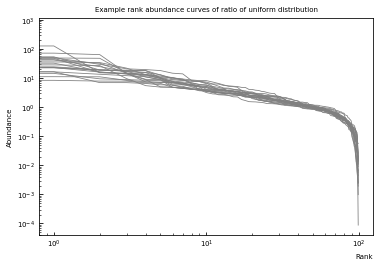

In [11]:
plt.title('Example rank abundance curves of ratio of uniform distribution')
N = 100
for i in range(20):
    a = np.random.uniform(0,1,N)
    b = np.random.uniform(0,1,N)
    plt.plot(np.sort(a/b)[::-1], color='grey')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Rank', x=1, ha='right')
plt.ylabel('Abundance')
plt.show()

Does this function fit to experimental data?

Plankton bacteria phi : 8.62E-01 pvalue : 1.23E-03
Plankton eukarya phi : 7.31E-01 pvalue : 4.03E-03
Stool A phi : 9.27E-01 pvalue : 2.55E-01
Stool B phi : 8.51E-01 pvalue : 2.46E-01
Female palm phi : 8.08E-01 pvalue : 3.78E-01
Sanger phi : 6.57E-01 pvalue : 2.67E-03
Illumina phi : 6.49E-01 pvalue : 7.21E-04
Pyroseq phi : 5.06E-01 pvalue : 1.20E-02


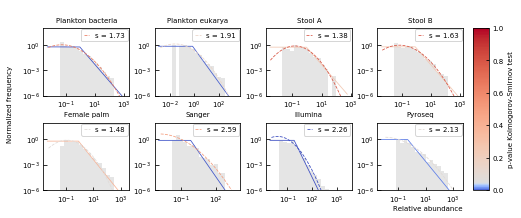

In [12]:
bins = np.logspace(-8, -1, 30)
x_fit = np.logspace(-8, -1, 1000)

fig = plt.figure(figsize=(ELIFE.FULLWIDTH, 3))  # , tight_layout=True)
gs = gridspec.GridSpec(2, 4, bottom=0.1, top=0.85,
                       left=0.1, right=0.9, wspace=0.3, hspace=0.4)
gs_cbar = gridspec.GridSpec(1, 1, bottom=0.1, top=0.85, left=0.92, right=0.95)
gs_tot = gridspec.GridSpec(1, 1, bottom=0.05, top=0.95, left=0.05, right=0.9)

keys = ['plankton_bacteria', 'plankton_eukarya', 'David_stool_A', 'David_stool_B',
        'Caporaso_F4_L_palm_L6', 'Sanger', 'Illumina', 'Pyroseq']

titles = ['Plankton bacteria', 'Plankton eukarya', 'Stool A', 'Stool B',
          'Female palm', 'Sanger', 'Illumina', 'Pyroseq']

for i, key, title in zip(range(len(keys)), keys, titles):
    ax = fig.add_subplot(gs[i])
    ax.set_title(title)

    if key in df_ts:
        d = np.copy(df_ts[key].values[0, 1:])
    elif key in df_st:
        d = np.copy(df_st[key].values[0, 1:])
    
    # rescale
    d = d[d > 0]    
    d /= 10**np.mean(np.log10(d))
    
    phi = np.median(d)
    rud = RatioUniformDistributions(name='rud')
    
    bins = np.logspace(np.log10(np.min(d))-1, np.log10(np.max(d))+1, 21)
    x_fit = np.logspace(np.log10(np.min(d))-1, np.log10(np.max(d))+1, 500)
    
    cmap = plt.cm.get_cmap('coolwarm')
    norm = normalizations['pval']
    
    stat, pval = stats.kstest(d, rud._cdf, args=((phi,)))
    ax.plot(x_fit, ratio_uniform_distributions(x_fit, phi), color=cmap(norm(pval)))
    print(title, 'phi : %.2E' % phi, 'pvalue : %.2E' % pval)
    
    pars = fit_heavytail(d)
    plot_heavytail(d, pars, ax=ax, linestyle='--')
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim([1e-6, 1e2])

ax_cbar = fig.add_subplot(gs_cbar[0])
mcolorbar.ColorbarBase(ax_cbar, cmap=plt.cm.coolwarm,
                       orientation='vertical', norm=normalizations['pval'])

ax_cbar.set_ylabel('p-value Kolmogorov-Smirnov test')
ax = fig.add_subplot(gs_tot[:], frameon=False)
ax.tick_params(axis='both', left=False, labelleft=False,
               bottom=False, labelbottom=False)
ax.set_xlabel('Relative abundance', ha='right', x=1)
ax.set_ylabel('Normalized frequency')

#plt.savefig('figures/experimental_rud.pdf')
plt.show()

Illumina MH0033
phi 1.09e-06 1e-08 min 1e-08
number nonzero species 465 percentage dropped 0.633182 number undetected species 6.33E+07
stat 0.13330468496342562 pval 1.1476970504219642e-07


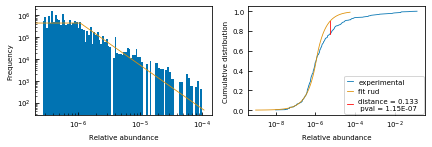

Illumina MH0044
phi 7e-07 1e-08 min 1e-08
number nonzero species 458 percentage dropped 0.56283628 number undetected species 5.63E+07
stat 0.11629979502718113 pval 7.462355204836845e-06


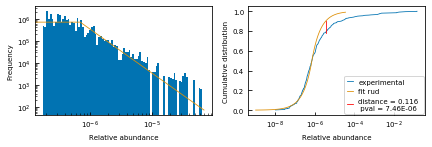

Illumina MH0072
phi 5.5e-07 1e-08 min 1e-08
number nonzero species 458 percentage dropped 0.40959728 number undetected species 4.10E+07
stat 0.1642783454162604 pval 2.86473772372287e-11


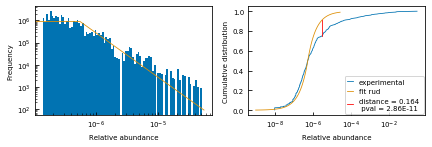

In [18]:
for i in np.random.randint(0, len(df_st['Illumina'])-1, size=3):
    print("Illumina", df_st['Illumina'].index[i])

    x = df_st['Illumina'].iloc[i];
    x = x[x > 0];
    percdropped = x['1']
    x = x.drop('1').to_numpy()
    
    phi1 = np.median(x)
    
    number_undetected_species = int(percdropped / min(x))
    x_with_undetected_species = np.append(x, np.full(number_undetected_species, min(x)))
    phi2 = np.median(x_with_undetected_species)
        
    print("phi", phi1, phi2, "min", min(x))
    phi = phi1
    xmax = 100*phi
    
    Nspec = len(x)
    print("number nonzero species", len(x), "percentage dropped", percdropped, "number undetected species %.2E" % number_undetected_species)

    fig = plt.figure(figsize=(7,2))

    ax1 = fig.add_subplot(121)

    ax1.hist(x, bins=np.logspace(np.log10(phi/4), np.log10(xmax), int(len(x)/5)), density=True)

    xx = np.linspace(0,xmax,100)
    ax1.plot(xx, ratio_uniform_distributions(xx, phi))
    
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlabel('Relative abundance')
    ax1.set_ylabel('Frequency')

    ax2 = fig.add_subplot(122)

    rud = RatioUniformDistributions(name='rud')
    stat, pval = stats.kstest(x, rud._cdf, args=((phi,)))
    print("stat", stat, "pval", pval)

    xx = np.logspace(np.log10(min(x))-1, np.log10(50*phi),100)

    ax2.plot(np.sort(x), np.arange(1, len(x)+1) / len(x), label='experimental')
    ax2.plot(xx, rud._cdf(xx, phi), label='fit rud')
    cdf_fit_ra = rud.cdf(np.sort(x), phi)
    i_max_dist = np.argmax( np.abs( cdf_fit_ra - np.arange(1, len(x)+1) / len(x)) )

    ax2.plot([np.sort(x)[i_max_dist] ] * 2, [i_max_dist/len(x), cdf_fit_ra[i_max_dist]], 
                    color = 'red',
                    label='distance = %.3f \n pval = %.2E' % 
             (np.abs(cdf_fit_ra[i_max_dist] - i_max_dist / len(x)), pval))
    ax2.set_xscale('log')
    ax2.set_xlabel('Relative abundance')
    ax2.set_ylabel('Cumulative distribution')
    ax2.legend()

    plt.show()

# Ratio of lognormal distributions

Example of ratio of lognormal distributions.

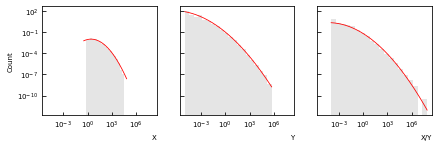

In [24]:
N = 500

def example_ratio_lognormals(mu_X, mu_Y, sigma_X, sigma_Y, sigma_XY):
    if True: #sigma_XY == 10:
        X = stats.lognorm.rvs(sigma_X, scale=np.exp(mu_X), size=N, random_state=None)
        Y = stats.lognorm.rvs(sigma_Y, scale=np.exp(mu_Y), size=N, random_state=None)
    else:
        cov = np.array([[sigma_X**2, sigma_XY],
                        [sigma_XY, sigma_Y**2]])
        mvn = np.random.multivariate_normal([mu_X, mu_Y], cov, size=N)
        X = np.exp(mvn[:,0])
        Y = np.exp(mvn[:,1])

    Z = X/Y

    mu_Z = mu_X - mu_Y
    sigma_Z = np.sqrt(sigma_X**2 + sigma_Y**2 - 2*sigma_XY)
    
    fig, axes = plt.subplots(1,3, figsize=(7,2), sharex='row', sharey='row')
    
    for ax, var, mu, sigma, xlabel in zip(axes, [X, Y, Z], [mu_X, mu_Y, mu_Z], [sigma_X, sigma_Y, sigma_Z], 
                                 ['X', 'Y', 'X/Y']):
        ax.set_xlabel(xlabel, x=1, ha='right')
        
        bins = np.logspace(np.log10(np.min(var)/2), np.log10(np.max(var)*2), 21)
        x = np.logspace(np.log10(np.min(var)/2), np.log10(np.max(var)*2), 300)

        ax.hist(var, bins=bins, density=True, alpha=0.2, color='grey')
        ax.plot(x, stats.lognorm.pdf(x, sigma, scale=np.exp(mu)), color='red')
        ax.set_yscale('log')
        ax.set_xscale('log')
    axes[0].set_ylabel('Count')
    plt.show()

mu_X = 5
mu_Y = 1
sigma_X = 2
sigma_Y = 4
sigma_XY = 3

example_ratio_lognormals(mu_X, mu_Y, sigma_X, sigma_Y, sigma_XY)

# Ratio of uncorrelated noncentral normal distributions

In [25]:
def ratio_normal_distributions_1(z, mux, muy, sigmax, sigmay):
    # z = y/x ! defined inversely too wikipedia page
    # https://en.wikipedia.org/wiki/Ratio_distribution#Uncorrelated_central_normal_ratio
    a = np.sqrt((z/sigmay)**2 + 1/sigmax**2)
    b = muy*z/sigmay**2 + mux/sigmax**2
    c = (mux/sigmax)**2 + (muy/sigmay)**2
    d = np.exp((b**2 - c*a**2)/(2*a**2))
    
    return ( b * d / a**3 * ( np.sqrt(2*np.pi) * sigmax * sigmay ) ** (-1) * 
            (stats.norm._cdf(b/a) - stats.norm._cdf(-b/a))) + \
            (a**2 * np.pi * sigmax * sigmay) * np.exp(-c/2)
        
ratio_normal_distributions = np.vectorize(ratio_normal_distributions_1) 


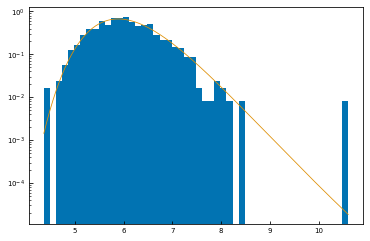

In [26]:
N = 1000

mux = 5; sigmax = 0.5;
muy = 30; sigmay = 0.5;

x = np.random.normal(mux, sigmax, N) 
y = np.random.normal(muy, sigmay, N)
z = y/x

plt.hist(z, density=True, bins=50)
plt.yscale('log')

zz = np.linspace(min(z), max(z), 300)
plt.plot(zz, ratio_normal_distributions(zz, mux, muy, sigmax, sigmay))
plt.show()

# With immigration

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


0.2295993440562877 1954.392102512659


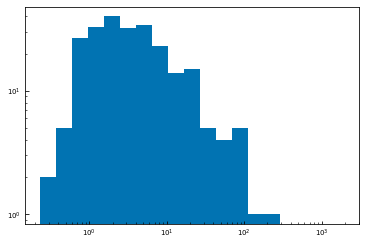

In [27]:
N = 1000
a = 1
b = 1
c = 1

A = np.random.uniform(0, a, N)
B = np.random.uniform(0, b, N)
C = np.random.uniform(0, c, N)

zero = (B + np.sqrt(B**2 - 4*A*C))/(2*A)

print(np.nanmin(zero), np.nanmax(zero))
bins = np.logspace(np.log10(np.nanmin(zero)), np.log10(np.nanmax(zero)), 20)

plt.hist(zero, bins=bins)
plt.xscale('log')
plt.yscale('log')
plt.show()

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here